<a href="https://colab.research.google.com/github/jayU000/python202206/blob/main/pythonbasic14_MachineLearning_wine0804.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Goal - seperate Red wine and White wine!

In [5]:
# G 드라이브 연결
from google.colab import drive
drive.mount('/gdrive/')

# 모듈 설정
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# https://dacon.io/competitions/open/235610/data

train = pd.read_csv('/gdrive/My Drive/Colab Notebooks/wine/train.csv')
test = pd.read_csv('/gdrive/My Drive/Colab Notebooks/wine/test.csv')
submission = pd.read_csv('/gdrive/My Drive/Colab Notebooks/wine/sample_submission.csv')

# 데이터 결합 (위 아래 방향으로 결합)
# 분석을 끝내고 학습을 시킬때 다시 분리 하기 편하도록 split 열을 만들어 각각 이름을 부여한다. 
train['split'] = 'Train'
test['split'] = 'Test'
data = pd.concat([train, test], axis=0)

print(data.info())


Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 6497 non-null   int64  
 1   quality               5497 non-null   float64
 2   fixed acidity         6497 non-null   float64
 3   volatile acidity      6497 non-null   float64
 4   citric acid           6497 non-null   float64
 5   residual sugar        6497 non-null   float64
 6   chlorides             6497 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6497 non-null   float64
 11  sulphates             6497 non-null   float64
 12  alcohol               6497 non-null   float64
 13  type   

In [6]:
# index 구분자
# quality 품질
# fixed acidity 산도
# volatile acidity 휘발성산
# citric acid 시트르산
# residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
# chlorides 염화물
# free sulfur dioxide 독립 이산화황
# total sulfur dioxide 총 이산화황
# density 밀도
# pH 수소이온농도
# sulphates 황산염
# alcohol 도수
# type 종류

#drop index column
train= train.drop(['index'],axis=1)
train.head(5)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,split
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,Train
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,Train
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,Train
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,Train
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,Train


In [7]:
train.shape, test.shape

((5497, 14), (1000, 14))

In [8]:
#info 활용
train.info()
train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
 13  split                 5497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 601.4+ KB


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,split
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497,5497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,Train
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4159,5497
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,NaN,NaN
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,NaN,NaN
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,NaN,NaN
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,NaN,NaN
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,NaN,NaN
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,NaN,NaN


In [ ]:
# !pip install -U pandas-profiling
# !pip install pandas_profiling
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 4.3 MB/s 
     |████████████████████████████████| 596 kB 41.8 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 4.7 MB 40.4 MB/s 
     |████████████████████████████████| 102 kB 10.8 MB/s 
     |████████████████████████████████| 690 kB 43.6 MB/s 
     |████████████████████████████████| 812 kB 45.4 MB/s 
     |████████████████████████████████| 38.1 MB 48.0 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=158e7ffb2789166f671dc67cd267241f68405c6b67671b5b71b50831ba726d39
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=8bb720877c49a7de8426e547c4f0d8d6fa824d4864c3919d48889ab2ac2a516c
  Stored in direct

In [2]:
# import pandas_profiling as pp

# tr = train.profile_report()
# tr

In [11]:
# onehot_prefix = []
# data[col] = data[col].astype('category')    # 그냥 문자열 데이터가 아닌 카테고리로 형변환 
data = pd.get_dummies(data, columns = ['type'])
# onehot_prefix.append(data)

# data.loc[:, [col for col in data.columns if col[:3] in onehot_prefix]].head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 6497 non-null   int64  
 1   quality               5497 non-null   float64
 2   fixed acidity         6497 non-null   float64
 3   volatile acidity      6497 non-null   float64
 4   citric acid           6497 non-null   float64
 5   residual sugar        6497 non-null   float64
 6   chlorides             6497 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6497 non-null   float64
 11  sulphates             6497 non-null   float64
 12  alcohol               6497 non-null   float64
 13  split                 6497 non-null   object 
 14  type_red              6497 non-null   uint8  
 15  type_white            

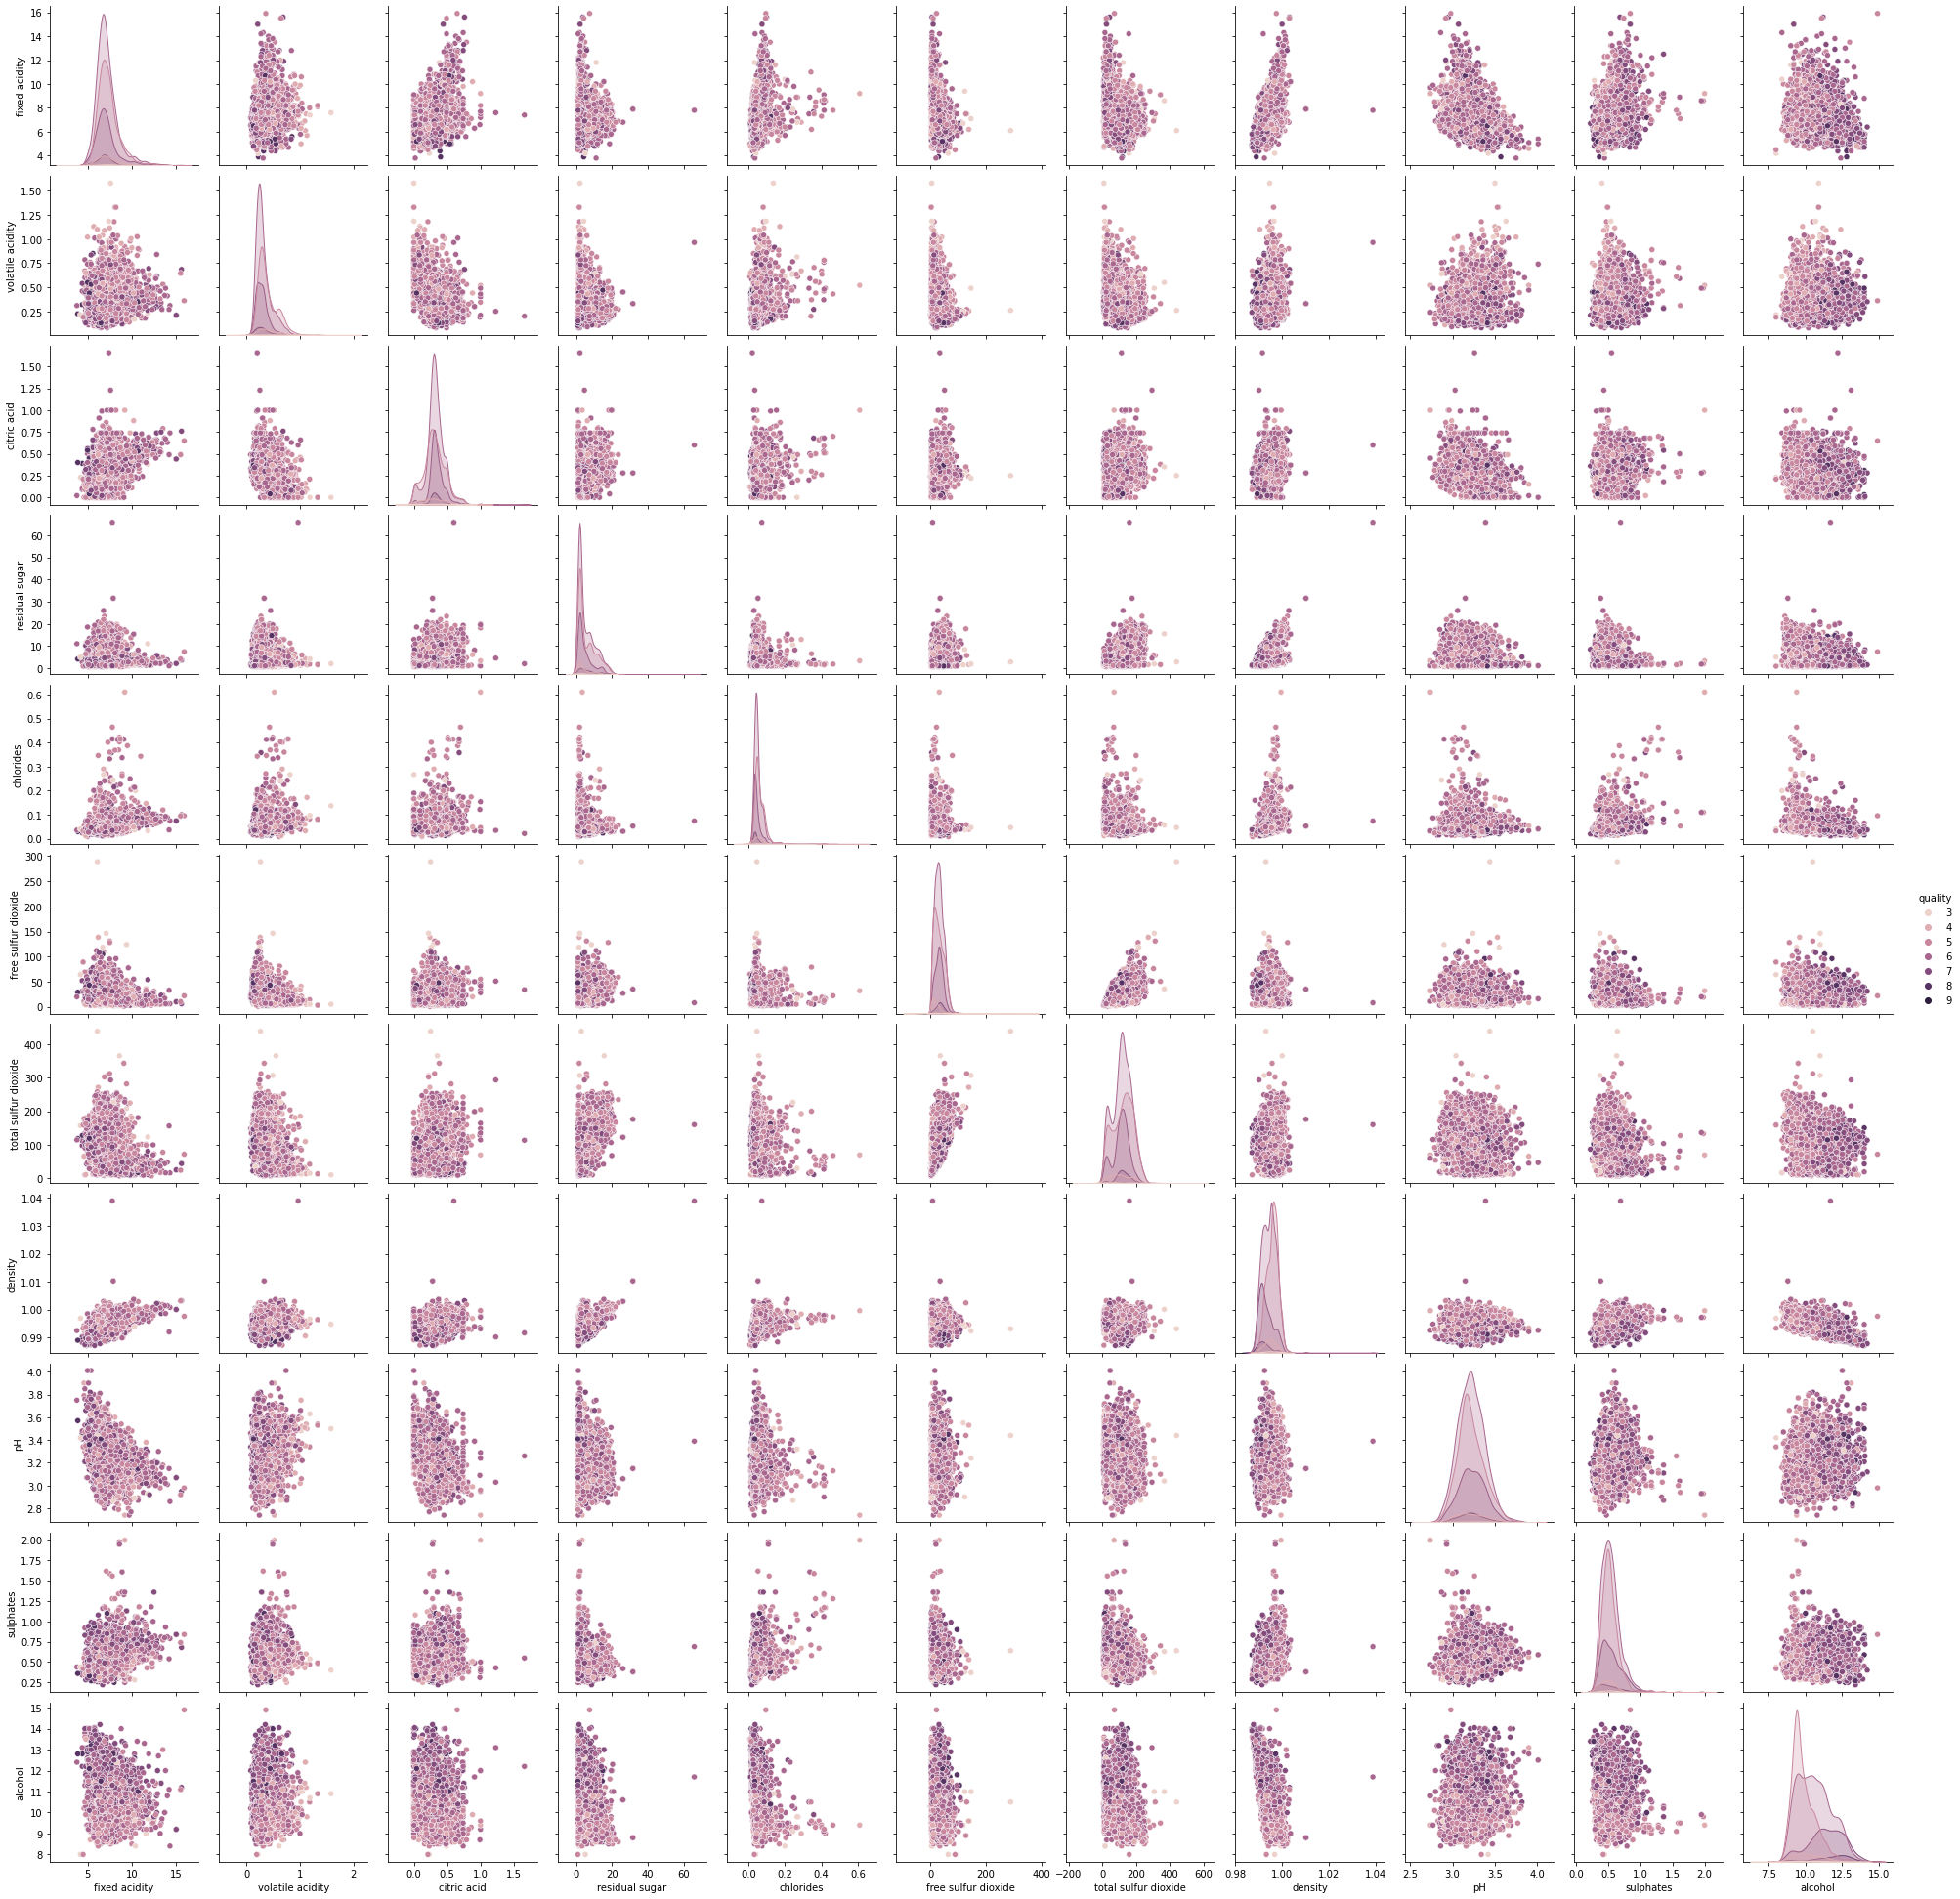

In [12]:
sns.pairplot(train, hue='quality')

In [13]:
# train= train.drop(['index'],axis=1)

KeyError: ignored

In [18]:
#  1   quality               5497 non-null   float64
#  2   fixed acidity         6497 non-null   float64
#  3   volatile acidity      6497 non-null   float64
#  4   citric acid           6497 non-null   float64
#  5   residual sugar        6497 non-null   float64
#  6   chlorides             6497 non-null   float64
#  7   free sulfur dioxide   6497 non-null   float64
#  8   total sulfur dioxide  6497 non-null   float64
#  9   density               6497 non-null   float64
#  10  pH                    6497 non-null   float64
#  11  sulphates             6497 non-null   float64
#  12  alcohol               6497 non-null   float64
#  13  split                 6497 non-null   object 
#  14  type_red              6497 non-null   uint8  
#  15  type_white            6497 non-null   uint8  

selected_features = ['fixed acidity','volatile acidity','citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates', 'alcohol', 'type_red', 'type_white' ]

y_train = data.loc[data['split']=='Train', 'quality']
X_train = data.loc[data['split']=='Train', selected_features]
X_test = data.loc[data['split']=='Test', selected_features]

print('Train 데이터 셋 크기 : ', X_train.shape, y_train.shape)
print('Test 데이터 셋 크기 : ', X_test.shape)

Train 데이터 셋 크기 :  (5497, 13) (5497,)
Test 데이터 셋 크기 :  (1000, 13)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=1)
columns = 'fixed acidity','volatile acidity','citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates', 'alcohol', 'type_red', 'type_white'
labels = '3','4','5','6','7','8','9'
X_tr, X_val, y_tr, y_val,columns,labels

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 3810            6.4              0.29         0.21            9.65      0.041   
 2274            7.5              0.49         0.19            1.90      0.076   
 2346            7.4              0.41         0.66           10.80      0.051   
 3118            7.6              0.27         0.24            3.80      0.058   
 2048            6.0              0.35         0.46            0.90      0.033   
 ...             ...               ...          ...             ...        ...   
 905             7.8              0.27         0.58           11.20      0.036   
 5192            6.8              0.39         0.34            7.40      0.020   
 3980            6.7              0.30         0.50           12.10      0.045   
 235             6.5              0.19         0.28            1.40      0.046   
 5157            6.0              0.20         0.24            1.80      0.030   
 
       free su

In [23]:
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [24]:
# X_tr, X_val, y_tr, y_val

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def draw_cm(model, X_val, y_val, labels, title=''):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_val, y_pred) # 혼돈 행렬 구하기
    ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap='Blues')
    
    if title: plt.title(title)
    plt.show()
    # 모델 평가 (ConfusionMatrix)

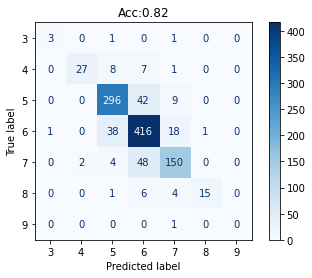

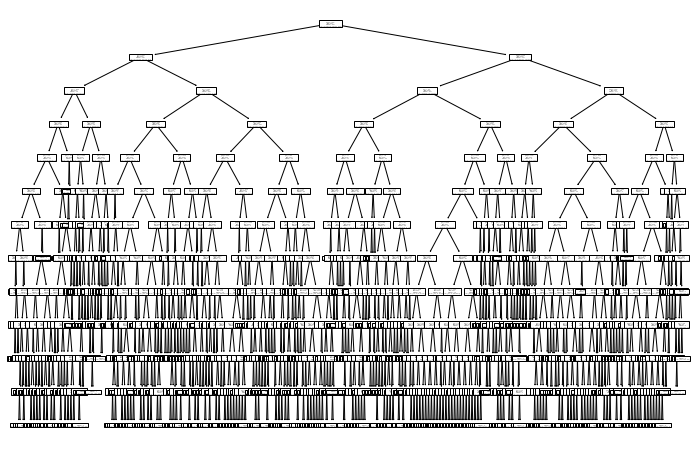

In [28]:
from sklearn.tree import DecisionTreeClassifier as DT 
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def draw_cm(model, X, y, labels, title=''):
  y_pred = model.predict(X)
  cm = confusion_matrix(y, y_pred) # 혼돈 행렬 구하기
  ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap='Blues')
  if title: plt.title(title)

# 학습
model = DT(criterion='gini', max_depth=12)
model.fit(X_train, y_train)

# 정확도 출력 및 혼돈행렬 시각화
acc = model.score(X_val, y_val)
draw_cm(model, X_val, y_val, labels, title = f'Acc:{np.round(acc,2)}')
plt.show()

# 트리 시각화
plt.figure(figsize=(12,8))
plot_tree(model)
plt.show()

In [29]:
# 훈련용과 검증용 8:2 로 분할

from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=20)

In [30]:
# voting
from sklearn.ensemble import VotingClassifier as Vot 
from sklearn.tree import DecisionTreeClassifier as DT 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier as KN   
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier as XGBC 

list_score = []

for i in range(1, 20):

  xgbc = XGBC(n_estimators=100, max_depth=i, random_state=10) 
  xgbc.fit(X_tr, y_tr) 

  rfc = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=10) 
  rfc.fit(X_tr, y_tr)
  
  dtc = DT(max_depth=i, random_state = 10)
  dtc.fit(X_tr, y_tr)

  evc = Vot(estimators=[('XGBC', xgbc),('RFC', rfc),('DT', dtc)], voting='hard')   
  evc.fit(X_tr, y_tr) 

  # 예측 (시험)
  evc_pred = evc.predict(X_val)           
  evc_pred 

  # 평가
  from sklearn.metrics import accuracy_score  
  list_score.append(accuracy_score(y_val, evc_pred))

  print(f'max_depth={i} 평균 : {accuracy_score(y_val, evc_pred)}')

list_score.sort(reverse=True)
print(list_score)

max_depth=1 평균 : 0.5327272727272727
max_depth=2 평균 : 0.5181818181818182
max_depth=3 평균 : 0.5390909090909091
max_depth=4 평균 : 0.5463636363636364
max_depth=5 평균 : 0.5627272727272727
max_depth=6 평균 : 0.5754545454545454
max_depth=7 평균 : 0.5927272727272728
max_depth=8 평균 : 0.6063636363636363
max_depth=9 평균 : 0.6118181818181818
max_depth=10 평균 : 0.6245454545454545
max_depth=11 평균 : 0.65
max_depth=12 평균 : 0.6581818181818182
max_depth=13 평균 : 0.6581818181818182
max_depth=14 평균 : 0.6645454545454546
max_depth=15 평균 : 0.6690909090909091
max_depth=16 평균 : 0.6645454545454546
max_depth=17 평균 : 0.6627272727272727
max_depth=18 평균 : 0.6709090909090909
max_depth=19 평균 : 0.6645454545454546
[0.6709090909090909, 0.6690909090909091, 0.6645454545454546, 0.6645454545454546, 0.6645454545454546, 0.6627272727272727, 0.6581818181818182, 0.6581818181818182, 0.65, 0.6245454545454545, 0.6118181818181818, 0.6063636363636363, 0.5927272727272728, 0.5754545454545454, 0.5627272727272727, 0.5463636363636364, 0.53909090909

In [31]:
list_score = []

for i in range(20, 30):

  xgbc = XGBC(n_estimators=100, max_depth=i, random_state=10) 
  xgbc.fit(X_tr, y_tr) 

  rfc = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=10) 
  rfc.fit(X_tr, y_tr)
  
  dtc = DT(max_depth=i, random_state = 10)
  dtc.fit(X_tr, y_tr)

  evc = Vot(estimators=[('XGBC', xgbc),('RFC', rfc),('DT', dtc)], voting='hard')   
  evc.fit(X_tr, y_tr) 

  # 예측 (시험)
  evc_pred = evc.predict(X_val)           
  evc_pred 

  # 평가
  from sklearn.metrics import accuracy_score  
  list_score.append(accuracy_score(y_val, evc_pred))

  print(f'max_depth={i} 평균 : {accuracy_score(y_val, evc_pred)}')

list_score.sort(reverse=True)
print(list_score)

max_depth=20 평균 : 0.67
max_depth=21 평균 : 0.6709090909090909
max_depth=22 평균 : 0.6672727272727272
max_depth=23 평균 : 0.6727272727272727
max_depth=24 평균 : 0.6718181818181819
max_depth=25 평균 : 0.68
max_depth=26 평균 : 0.6718181818181819
max_depth=27 평균 : 0.67
max_depth=28 평균 : 0.6763636363636364
max_depth=29 평균 : 0.67
[0.68, 0.6763636363636364, 0.6727272727272727, 0.6718181818181819, 0.6718181818181819, 0.6709090909090909, 0.67, 0.67, 0.67, 0.6672727272727272]


In [32]:
list_score = []

for i in range(15, 35):
  xgbc = XGBC(n_estimators=100, max_depth=i, random_state=10) 
  xgbc.fit(X_tr, y_tr) 

  # 예측 (시험)
  xgbc_pred = xgbc.predict(X_val)
  xgbc_pred 

  # 평가
  from sklearn.metrics import accuracy_score  
  list_score.append(accuracy_score(y_val, xgbc_pred))
  
  print(f'max_depth={i} 평균 : {accuracy_score(y_val, xgbc_pred)}')

list_score.sort(reverse=True)
print(list_score)

max_depth=15 평균 : 0.6654545454545454
max_depth=16 평균 : 0.6627272727272727
max_depth=17 평균 : 0.6572727272727272
max_depth=18 평균 : 0.6654545454545454
max_depth=19 평균 : 0.6572727272727272
max_depth=20 평균 : 0.6654545454545454
max_depth=21 평균 : 0.6645454545454546
max_depth=22 평균 : 0.66
max_depth=23 평균 : 0.6554545454545454
max_depth=24 평균 : 0.6590909090909091
max_depth=25 평균 : 0.6672727272727272
max_depth=26 평균 : 0.6645454545454546
max_depth=27 평균 : 0.6581818181818182
max_depth=28 평균 : 0.6609090909090909
max_depth=29 평균 : 0.6618181818181819
max_depth=30 평균 : 0.66
max_depth=31 평균 : 0.6663636363636364
max_depth=32 평균 : 0.6745454545454546
max_depth=33 평균 : 0.66
max_depth=34 평균 : 0.6590909090909091
[0.6745454545454546, 0.6672727272727272, 0.6663636363636364, 0.6654545454545454, 0.6654545454545454, 0.6654545454545454, 0.6645454545454546, 0.6645454545454546, 0.6627272727272727, 0.6618181818181819, 0.6609090909090909, 0.66, 0.66, 0.66, 0.6590909090909091, 0.6590909090909091, 0.6581818181818182, 0.6

In [34]:
list_score = []

for i in range(15, 60):
  rfc = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=10) 
  rfc.fit(X_tr, y_tr)

  # 예측 (시험)
  rfc_pred = rfc.predict(X_val)           
  rfc_pred 

  # 평가
  from sklearn.metrics import accuracy_score  
  list_score.append(accuracy_score(y_val, rfc_pred))

  print(f'max_depth={i} 평균 : {accuracy_score(y_val, rfc_pred)}')

list_score.sort(reverse=True)
print(list_score)

max_depth=15 평균 : 0.68
max_depth=16 평균 : 0.6736363636363636
max_depth=17 평균 : 0.6754545454545454
max_depth=18 평균 : 0.6790909090909091
max_depth=19 평균 : 0.6709090909090909
max_depth=20 평균 : 0.6781818181818182
max_depth=21 평균 : 0.6681818181818182
max_depth=22 평균 : 0.6881818181818182
max_depth=23 평균 : 0.68
max_depth=24 평균 : 0.6790909090909091
max_depth=25 평균 : 0.6854545454545454
max_depth=26 평균 : 0.6772727272727272
max_depth=27 평균 : 0.6827272727272727
max_depth=28 평균 : 0.6818181818181818
max_depth=29 평균 : 0.6845454545454546
max_depth=30 평균 : 0.6809090909090909
max_depth=31 평균 : 0.6863636363636364
max_depth=32 평균 : 0.6809090909090909
max_depth=33 평균 : 0.6818181818181818
max_depth=34 평균 : 0.6818181818181818
max_depth=35 평균 : 0.6818181818181818
max_depth=36 평균 : 0.6818181818181818
max_depth=37 평균 : 0.6818181818181818
max_depth=38 평균 : 0.6818181818181818
max_depth=39 평균 : 0.6818181818181818
max_depth=40 평균 : 0.6818181818181818
max_depth=41 평균 : 0.6818181818181818
max_depth=42 평균 : 0.681818181

In [35]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=22, random_state=10) 
rfc.fit(X_tr, y_tr)

# 예측 (시험)
rfc_pred = rfc.predict(X_val)           
rfc_pred 

# 평가
from sklearn.metrics import accuracy_score  
list_score.append(accuracy_score(y_val, rfc_pred))

In [37]:
# 제출용 파일 만들기

y_test_pred = rfc.predict(X_test)
submission['quality'] = y_test_pred.astype(int)

submission.to_csv('/gdrive/My Drive/Colab Notebooks/wine/submission_0804.csv', index=False)